# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

# Сразу проверяю количество дубликатов
data.duplicated().sum()

0

In [2]:
# пример данных в несколько строк
data.sample(8).T

,5274,13944,8204,9079,18439,21904,15587,3653
total_images,15,0,16,0,15,0,5,6
last_price,5450000.0,5250000.0,5550000.0,4650000.0,13500000.0,3500000.0,3100000.0,5100000.0
total_area,43.0,59.0,66.0,56.0,95.3,42.0,40.0,60.0
first_day_exposition,2018-11-01T00:00:00,2018-02-13T00:00:00,2016-06-25T00:00:00,2017-07-05T00:00:00,2019-03-18T00:00:00,2019-04-29T00:00:00,2017-11-27T00:00:00,2016-06-06T00:00:00
rooms,1,3,3,3,3,1,1,3
ceiling_height,2.8,2.5,2.55,NaN,3.35,2.65,NaN,NaN
floors_total,8.0,9.0,12.0,5.0,7.0,10.0,24.0,9.0
living_area,16.0,39.0,42.5,39.0,56.0,19.5,16.4,44.0
floor,4,3,3,5,4,7,6,7
is_apartment,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN


In [68]:
# общая инормация о массиве
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               12137 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23650.0,9.862326e+00,5.682278e+00,0.000000,6.000000e+00,9.0,1.400000e+01,50.0
last_price,23650.0,6.541127e+06,1.089640e+07,12190.000000,3.400000e+06,4650000.0,6.799000e+06,763000000.0
total_area,23650.0,6.032907e+01,3.566181e+01,12.000000,4.000000e+01,52.0,6.970000e+01,900.0
rooms,23650.0,2.070106e+00,1.078620e+00,0.000000,1.000000e+00,2.0,3.000000e+00,19.0
ceiling_height,23650.0,2.737416e+00,1.005809e+00,1.000000,2.550000e+00,2.7,2.700000e+00,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.000000,5.000000e+00,9.0,1.600000e+01,60.0
living_area,21752.0,3.444836e+01,2.203766e+01,2.000000,1.860000e+01,30.0,4.230000e+01,409.7
floor,23650.0,5.893277e+00,4.883317e+00,1.000000,2.000000e+00,4.0,8.000000e+00,33.0
kitchen_area,21381.0,1.056640e+01,5.901753e+00,1.300000,7.000000e+00,9.1,1.200000e+01,112.0
balcony,12137.0,1.153003e+00,1.071169e+00,0.000000,0.000000e+00,1.0,2.000000e+00,5.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

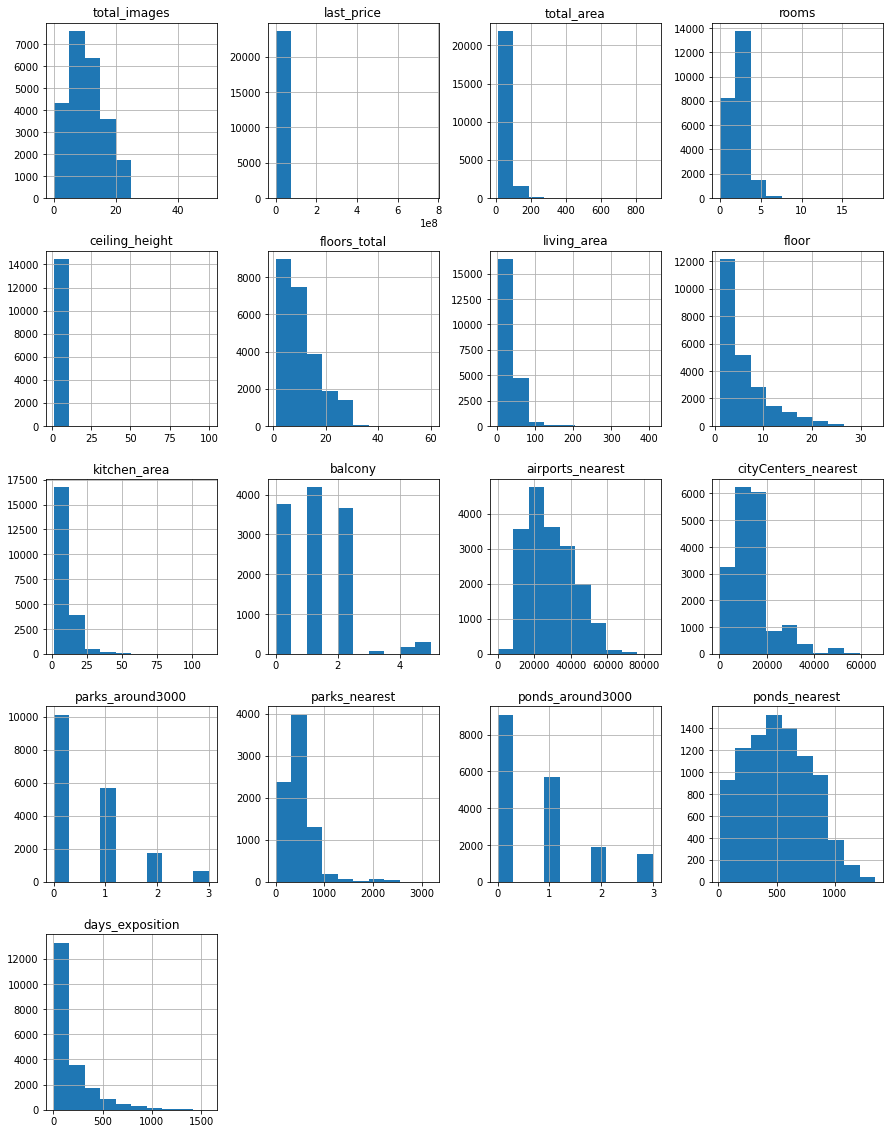

In [6]:
data.hist(figsize=(15, 20))

In [7]:
data[['locality_name', 'days_exposition']].sample(10)

,locality_name,days_exposition
21670,посёлок Шушары,740.0
16935,Гатчина,NaN
18239,Санкт-Петербург,109.0
18555,Санкт-Петербург,NaN
11125,Санкт-Петербург,138.0
6076,Санкт-Петербург,58.0
19455,деревня Трубников Бор,276.0
12175,Сестрорецк,168.0
13891,Санкт-Петербург,73.0
20203,Колпино,178.0


### Предобработка данных

In [8]:
# посмотрим сколько пустых значений в названии населённого пункта
print(len(data[data['locality_name'].isna()]), ' из ', data.shape[0], round(len(data[data['locality_name'].isna()]) / data.shape[0],4))

49  из  23699 0.0021


Т.к. данных с отсутствующим населенным пунктом очень мало, а населённый пункт очень важен для исследования, считаю, что эти данные лучше отсечь.

In [9]:
#удаление строк, в столбцах которых locality_name = NaN
data = data.dropna(subset=['locality_name'])
data.shape[0]

23650

In [10]:
#посмотрим сколько данных без пропусков
best_data = data.dropna()
best_data.shape[0]

250

Предполагаю, что населённых пунктов с одинаковыми именами в пределах области нет. Префикс перед именем лучше убрать

In [11]:

data = data.apply(lambda x: x.replace({'ё':'е'}, regex=True))
data = data.apply(lambda x: x.replace({'поселок при железнодорожной станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок городского типа ':''}, regex=True))
data = data.apply(lambda x: x.replace({'городской поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'коттеджный поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок ':''}, regex=True))
data = data.apply(lambda x: x.replace({'село ':''}, regex=True))
data = data.apply(lambda x: x.replace({'деревня ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садовое товарищество ':''}, regex=True))
data = data.apply(lambda x: x.replace({'поселок станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садоводческое некоммерческое товарищество ':''}, regex=True))
data = data.apply(lambda x: x.replace({'посёлок при железнодорожной станции ':''}, regex=True))
data = data.apply(lambda x: x.replace({'садовое товарищество ':''}, regex=True))
data = data.apply(lambda x: x.replace({'Пансионат ':''}, regex=True))
# и проверяю дубликаты
data.duplicated().sum()

0

In [14]:
data['locality_name'].value_counts().head(13)

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Петергоф             201
Сестрорецк           183
Красное Село         178
Name: locality_name, dtype: int64

Заполним 'is_apartment' как False, т.к. апартаменты достаточно редкое явление.

In [66]:
data.groupby('is_apartment')['is_apartment'].count()
data['is_apartment'] = data['is_apartment'].fillna(False)



In [67]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['locality_name'] == t), 'ceiling_height'].median()


In [78]:
data_pivot = data.pivot_table(index = ['rooms'], values = 'balcony', aggfunc='median')

data_pivot = data.pivot_table(index = ['is_apartment'], values = 'balcony', aggfunc='mean')
#display(
data_pivot

,balcony
is_apartment,
False,1.150669
True,2.064516


In [ ]:
num_data = data[['total_images', 'last_price', 'total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition', 'price_per_meter']]
num_data

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
data['price_per_meter'] = data.last_price / data.total_area
data.sort_values(by='price_per_meter', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1.907500e+06
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0,1.736842e+06
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN,1.542605e+06
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0,1.000748e+06
4996,20,124000000.0,124.5,2017-10-12T00:00:00,4,3.00,4.0,67.2,2,False,...,NaN,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0,9.959839e+05
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0,8.575429e+05
17172,14,28000000.0,33.0,2019-04-30T00:00:00,1,3.50,5.0,NaN,2,NaN,...,NaN,Санкт-Петербург,23403.0,1462.0,3.0,342.0,3.0,27.0,NaN,8.484848e+05
4859,16,28000000.0,33.0,2019-04-29T00:00:00,1,3.50,5.0,NaN,2,NaN,...,NaN,Санкт-Петербург,23447.0,1376.0,3.0,344.0,3.0,119.0,NaN,8.484848e+05
16647,15,122000000.0,145.0,2017-04-25T00:00:00,3,3.30,6.0,36.0,2,NaN,...,NaN,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0,8.413793e+05
17912,17,135000000.0,166.0,2019-02-07T00:00:00,3,3.30,7.0,52.0,1,NaN,...,NaN,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,NaN,8.132530e+05


### Проведите исследовательский анализ данных

                     total_images  last_price  total_area     rooms  \
total_images             1.000000    0.104558    0.115893  0.099660   
last_price               0.104558    1.000000    0.653743  0.363421   
total_area               0.115893    0.653743    1.000000  0.758745   
rooms                    0.099660    0.363421    0.758745  1.000000   
ceiling_height          -0.001880    0.085396    0.095417  0.054323   
floors_total             0.009822   -0.006745   -0.075252 -0.227913   
living_area              0.104952    0.566517    0.939534  0.846088   
floor                    0.030832    0.026770   -0.024178 -0.150604   
kitchen_area             0.105876    0.520233    0.608879  0.270585   
balcony                  0.121256    0.029807    0.048799  0.018950   
airports_nearest        -0.002364   -0.026366   -0.031055 -0.060877   
cityCenters_nearest     -0.047835   -0.206887   -0.231904 -0.184322   
parks_around3000         0.021087    0.150886    0.164579  0.136793   
parks_

array([[<AxesSubplot:xlabel='total_images', ylabel='total_images'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_images'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_images'>,
        <AxesSubplot:xlabel='ceiling_height', ylabel='total_images'>,
        <AxesSubplot:xlabel='floors_total', ylabel='total_images'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='floor', ylabel='total_images'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_images'>,
        <AxesSubplot:xlabel='balcony', ylabel='total_images'>,
        <AxesSubplot:xlabel='airports_nearest', ylabel='total_images'>,
        <AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_images'>,
        <AxesSubplot:xlabel='parks_around3000', ylabel='total_images'>,
        <AxesSubplot:xlabel='parks_nearest', ylabel='total_images'>,
        <AxesSubplot:xlabel='ponds_around3000', ylabel

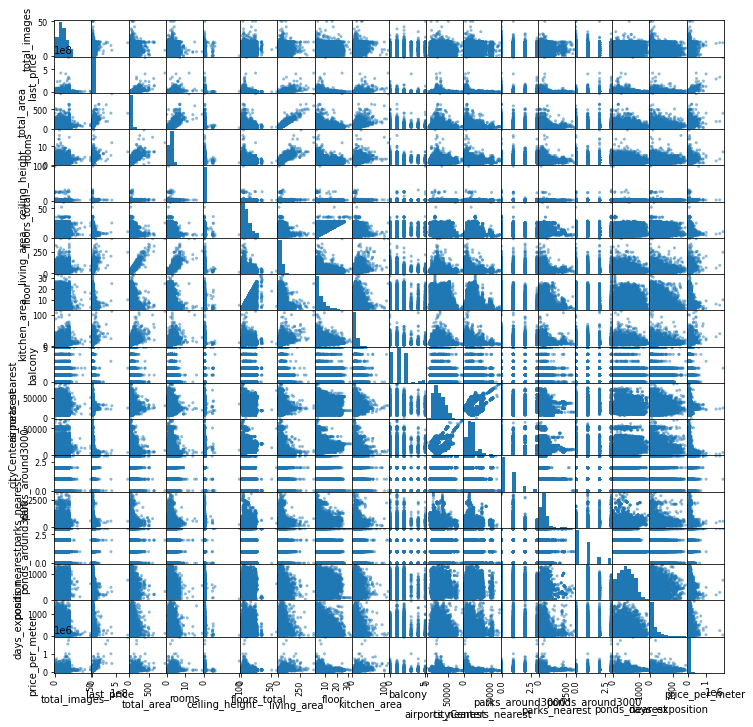

In [31]:
print(num_data.corr()) 

pd.plotting.scatter_matrix(num_data, figsize=(12, 12))

### Общий вывод

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод